# **Projeto Final: Análise de Dados - Grupo 4**

Utilizaremos o DataSet "*Preços dos Carros no Brasil*".

Nosso objetivo é verificar se existe alguma conexão das variáveis nas relações:
* Tempo x Preço Médio
* Combustível x Tamanho do Motor
* Marca x Preço Médio

# Sobre o DataSet a ser analisado

Cerca de 600 mil carros foram colocados no documento a ser analisado. Os dados foram extraídos do site da FIPE, que atualiza mensalmente as informações, sendo necessário, representar a data que o dado foi obtido.

Cada linha da tabela representa um carro em específico, diferenciando-o por diversos fatores, como o ano e mês de referência, o tipo de combustível utilizado, o tipo de câmbio, o tamanho do motor, o código fipe, a marca e modelo e por fim, o preço médio que o carro é encontrado no Brasil, em reais.


# Variáveis
* year_of_reference: ano correspondente à data que o dado foi coletado. 
* month_of_reference: mês referente à data que o dado foi coletado.
* fipe_code: identificação utilizada para cada modelo de carro no site da FIPE.
* authentication: código que autentica a consulta no site da FIPE.
* brand: marca de cada carro nos dados.
* model: modelo de cada carro nos dados.
* fuel: tipo de combustível que o carro comporta (diesel ou gasolina)
* gear: tipo do câmbio de cada carro (automático ou manual); caso não esteja escrito 'Aut', assume-se que o carro em questão é necessariamente, manual.
* engine_size: tamanho do motor em centímetros cúbicos.
* year_model: corresponde à versão do modelo de cada carro analisado.
* avg_price_brl: média do preço do carro em reais, de acordo com a FIPE.

In [117]:
# Importando as Bibliotecas

%pip install pandas numpy pandas_datareader seaborn plotly matplotlib
import pandas as pd
import numpy as np
import pandas_datareader.data as web
import seaborn as sns
import plotly.express as px
import plotly.subplots as sp
import plotly.graph_objects as go
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import matplotlib.ticker as mticker

Note: you may need to restart the kernel to use updated packages.


## Tratamento de Dados

In [118]:
# Lendo o DataFrame e Analisando as Variáveis

df = pd.read_csv("fipe_cars.csv")

print(df.head(), df.dtypes, df.shape, sep="\n\n")


   year_of_reference month_of_reference fipe_code authentication  brand   
0               2021            January  038001-6     tlp4qry07m  Acura  \
1               2021            January  038001-6     s1wksdv9by  Acura   
2               2021            January  038001-6     skrbcfnkch  Acura   
3               2021            January  038001-6     rxzh76d5db  Acura   
4               2021            January  038001-6     qrm322tpd8  Acura   

     model      fuel    gear  engine_size  year_model  avg_price_brl  
0  NSX 3.0  Gasoline  manual          3.0        1995        40374.0  
1  NSX 3.0  Gasoline  manual          3.0        1994        38939.0  
2  NSX 3.0  Gasoline  manual          3.0        1993        37648.0  
3  NSX 3.0  Gasoline  manual          3.0        1992        35962.0  
4  NSX 3.0  Gasoline  manual          3.0        1991        32863.0  

year_of_reference       int64
month_of_reference     object
fipe_code              object
authentication         object
br

In [119]:
# Limpeza dos Dados

print(df.isna().sum())  # Não temos valores NaN!

df = df.drop(["fipe_code", "authentication", "gear", "year_model"], axis=1)  # Retirando as colunas desnecessárias para a nossa análise

df.head()

year_of_reference     0
month_of_reference    0
fipe_code             0
authentication        0
brand                 0
model                 0
fuel                  0
gear                  0
engine_size           0
year_model            0
avg_price_brl         0
dtype: int64


,year_of_reference,month_of_reference,brand,model,fuel,engine_size,avg_price_brl
0,2021,January,Acura,NSX 3.0,Gasoline,3.0,40374.0
1,2021,January,Acura,NSX 3.0,Gasoline,3.0,38939.0
2,2021,January,Acura,NSX 3.0,Gasoline,3.0,37648.0
3,2021,January,Acura,NSX 3.0,Gasoline,3.0,35962.0
4,2021,January,Acura,NSX 3.0,Gasoline,3.0,32863.0


In [120]:
# Identificando linhas duplicadas e eliminando-as.

print(df.duplicated().sum())
df.loc[df.duplicated()]

4


,year_of_reference,month_of_reference,brand,model,fuel,engine_size,avg_price_brl
135875,2021,June,Renault,DUSTER OROCH Dyna. 2.0 Flex 16V Mec.,Gasoline,2.0,69893.0
215184,2021,October,GM - Chevrolet,A-10 2.5/4.1,Gasoline,2.5,8879.0
383231,2022,May,GM - Chevrolet,Monza Classic SE 2.0 /MPFI e EFI 2p e 4p,Gasoline,2.0,10655.0
559711,2022,December,Ford,Ranger Limited 3.0 PSE 4x4 CD TB Diesel,Diesel,3.0,64638.0


In [121]:
df = df.drop_duplicates()
print(df.duplicated().sum())

0


In [122]:
# Nova dimensão do DataFrame após a limpeza de dados.
print(df.shape)

(599003, 7)


In [123]:
# Fundindo as colunas "year_of_reference" e "mounth_of_referece" como datas do tipo datetime.

mapeamento = {'January': "1", 'February': "2",  'March': "3", 'April': "4", 'May': "5", 'June':
              "6", 'July': "7", 'August': "8", 'September': "9", 'October': "10", 'November': "11", 'December': "12"}

df["month_of_reference"] = df["month_of_reference"].map(mapeamento)  # Transformando as strings do mês com o número correspondente

df["year_of_reference"] = df["year_of_reference"].astype(str)  # Transformando os anos em strings

df["date"] = df["month_of_reference"].str.cat(df["year_of_reference"], sep="/")  # Juntando os valores no formato de data

df["date"] = pd.to_datetime(df["date"], format="%m/%Y").dt.strftime('%Y/%m')  # Transformando em datetime

df = df.drop(columns=["month_of_reference", "year_of_reference"])  # Retirando as colunas que usamos

df

,brand,model,fuel,engine_size,avg_price_brl,date
0,Acura,NSX 3.0,Gasoline,3.0,40374.0,2021/01
1,Acura,NSX 3.0,Gasoline,3.0,38939.0,2021/01
2,Acura,NSX 3.0,Gasoline,3.0,37648.0,2021/01
3,Acura,NSX 3.0,Gasoline,3.0,35962.0,2021/01
4,Acura,NSX 3.0,Gasoline,3.0,32863.0,2021/01
...,...,...,...,...,...,...
599002,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,22790.0,2023/01
599003,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,22169.0,2023/01
599004,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,21565.0,2023/01
599005,Walk,Buggy Walk Sport 1.6 8V 58cv,Gasoline,1.6,20978.0,2023/01


## Visualização de Dados

### *Tempo x Preço Médio*

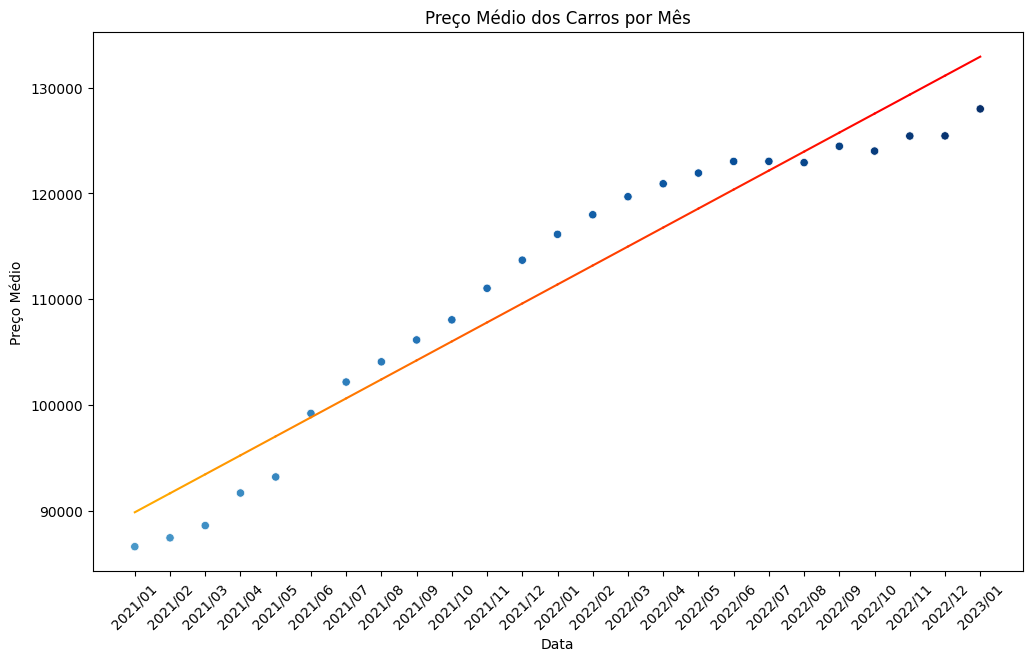

In [124]:
medias_data = df.groupby("date")["avg_price_brl"].mean()

datas = df["date"].unique()

valores = np.arange(25)

cores_dispersao = plt.colormaps["Blues"](np.linspace(0.6, 1, 25))
cmap_dispersao = mcolors.ListedColormap(cores_dispersao)

coeficientes = np.polyfit(valores, medias_data, 1)
regressao = np.polyval(coeficientes, valores)
indices_particoes = np.linspace(0, 24, 26, dtype=int)

plt.figure(figsize=(12, 7))
sns.scatterplot(x=datas, y=medias_data, c=valores, cmap=cmap_dispersao)
for i in range(25):
    segmento_x = valores[indices_particoes[i]:indices_particoes[i+1]+1]
    segmento_y = regressao[indices_particoes[i]:indices_particoes[i+1]+1]
    cor = plt.colormaps["autumn"]((-i+22)/32)
    plt.plot(segmento_x, segmento_y, color=cor)

plt.title("Preço Médio dos Carros por Mês")
plt.ylabel("Preço Médio")
plt.xlabel("Data")
plt.xticks(rotation=45)
plt.show()

In [125]:
# Os dados são do IBGE: https://www.ibge.gov.br/estatisticas/economicas/precos-e-custos/9256-indice-nacional-de-precos-ao-consumidor-amplo.html?=&t=series-historicas

ipca = pd.read_excel("ipca_mensal.xlsx")
ipca = ipca.drop(columns=["Variação mensal durante o Plano Real", "Unnamed: 1"])
ipca.columns = ipca.iloc[0]
ipca = ipca.drop([0, 1, 3, 4])
ipca.iloc[0] = ipca.iloc[0].str.replace(',', '.').astype(float)
ipca.index = ["IPCA"]
ipca = ipca.loc[:, "janeiro 2021":"janeiro 2023"]
ipca

,janeiro 2021,fevereiro 2021,março 2021,abril 2021,maio 2021,junho 2021,julho 2021,agosto 2021,setembro 2021,outubro 2021,...,abril 2022,maio 2022,junho 2022,julho 2022,agosto 2022,setembro 2022,outubro 2022,novembro 2022,dezembro 2022,janeiro 2023
IPCA,0.25,0.86,0.93,0.31,0.83,0.53,0.96,0.87,1.16,1.25,...,1.06,0.47,0.67,-0.68,-0.36,-0.29,0.59,0.41,0.62,0.53


In [126]:
# Os dados são do site Index Mundi: https://www.indexmundi.com/pt/pre%c3%a7os-de-mercado/?mercadoria=petr%c3%b3leo-bruto-brent&meses=60

petroleo = pd.read_excel("petroleo.xlsx")
petroleo = petroleo.drop(columns=["Mês", "Preço"])
petroleo = petroleo.iloc[31:56].T
petroleo.columns = ipca.columns
petroleo

,janeiro 2021,fevereiro 2021,março 2021,abril 2021,maio 2021,junho 2021,julho 2021,agosto 2021,setembro 2021,outubro 2021,...,abril 2022,maio 2022,junho 2022,julho 2022,agosto 2022,setembro 2022,outubro 2022,novembro 2022,dezembro 2022,janeiro 2023
Taxa de variação,0.0938,0.1358,0.0521,-0.0064,0.0505,0.0739,0.0181,-0.0587,0.0654,0.1213,...,-0.0849,0.0623,0.0686,-0.0929,-0.0947,-0.0856,0.0329,-0.0221,-0.1117,0.0271


In [282]:
ipca_acumulado = ipca.loc["IPCA"].cumsum().astype(float)
petroleo_acumulado = ((petroleo.loc["Taxa de variação"].cumsum() - petroleo.iloc[0, 0])*100).astype(float)
preco_perc = pd.Series((medias_data - medias_data[0])*100/(medias_data[0]))
preco_perc.index = ipca_acumulado.index

df_comparacoes = pd.concat([ipca_acumulado, preco_perc, petroleo_acumulado], axis=1)
df_comparacoes.columns = ["IPCA", "Preço dos Carros", "Petróleo"]

cores = [px.colors.qualitative.D3[1], px.colors.qualitative.Prism[4], 
         px.colors.qualitative.G10[5]]

fig = px.line(df_comparacoes, x=df_comparacoes.index, y=df_comparacoes.columns, 
                line_shape="spline", markers=True, color_discrete_sequence=cores)

markers = ["diamond", "hexagon", "square"]
i = 0 
for d in fig.data:
    d.marker.symbol = markers[i]
    d.marker.size = 7
    i += 1

fig.update_layout(title='Comparação com o IPCA e Petróleo', title_x=0.5, xaxis_title='Data',
                  yaxis_title='Aumento em %', width=900, height=600,
                  legend_title="Indicador")
fig.update_xaxes(tickangle=50)

fig.show()

### *Combustível x Tamanho do Motor*

In [246]:
df_combustivel = pd.DataFrame()
df_combustivel["Combustível"] = df["fuel"].unique()
df_combustivel["Frequência"] = np.array(df["fuel"].value_counts())

cores = [px.colors.qualitative.Plotly[0], px.colors.qualitative.Plotly[1], 
         px.colors.qualitative.D3[2]]  
# cores = [px.colors.qualitative.Dark24[0], px.colors.qualitative.Set1[4], px.colors.qualitative.Alphabet[9]]
fig = px.pie(df_combustivel, values = "Frequência", names = "Combustível", 
            title="Proporção de Combustíveis", template="presentation", 
            color_discrete_sequence=cores)
fig.update_layout(width=800, height=500)
fig.update_traces(textposition="inside", textinfo="percent+label")
fig.show()

In [247]:
proporcoes = df.groupby(["date", "fuel"]).size() / df.groupby("date").size()
df_proporcoes = proporcoes.unstack(level='fuel').reset_index()
df_proporcoes
fig = px.bar(df_proporcoes, "date", ["Gasoline", "Diesel", "Alcohol"], 
             title="Proporção de Combustíveis", color_discrete_sequence=cores,
             labels={"value": "Proporção", "date": "Data", "variable": "Combustível"})
fig.update_layout(width=800, height=500, title_x=0.5)
fig.show()

In [248]:
df_combustivel["Tamanho do Motor"] = np.flip(np.array(df.groupby("fuel")["engine_size"].mean()))
fig = px.bar(df_combustivel, "Combustível", "Tamanho do Motor", title="Média do Tamanho do Motor",
             color="Combustível", color_discrete_sequence=cores)
fig.update_layout(width=800, height=500, showlegend=False, title_x=0.5)
fig.show()

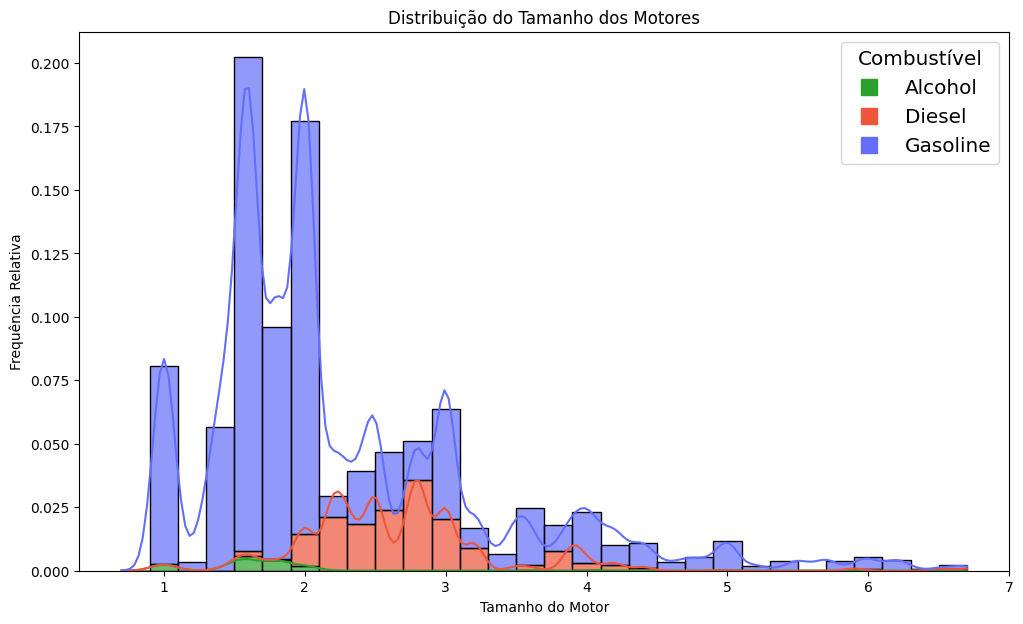

In [251]:
plt.figure(figsize=(12, 7))
sns.histplot(df, x="engine_size", bins=30, hue="fuel", stat="probability", multiple="stack",
             palette=cores, alpha=0.7, kde=True)

plt.title("Distribuição do Tamanho dos Motores")
plt.ylabel("Frequência Relativa")
plt.xlabel("Tamanho do Motor")

Alcohol = mlines.Line2D([], [], color=px.colors.qualitative.D3[2], marker='s', linestyle='None',
                        markersize=12, label='Alcohol')
Diesel = mlines.Line2D([], [], color=px.colors.qualitative.Plotly[1], marker='s', linestyle='None',
                       markersize=12, label='Diesel')
Gasoline = mlines.Line2D([], [], color=px.colors.qualitative.Plotly[0], marker='s',
                         linestyle='None', markersize=12, label='Gasoline')

plt.legend(handles=[Alcohol, Diesel, Gasoline], title="Combustível", title_fontsize="x-large",
           fontsize="x-large")
plt.show()

## *Marcas Famosas x Preço Médio*

In [232]:
marcas = np.array(['BMW', 'Ferrari', 'Ford', 'GM - Chevrolet', 'Honda', 'Jeep', 'Mclaren', 'Mercedes-Benz', 'Toyota', 'VW - VolksWagen'])

dfm = df[df['brand'].isin(marcas)]

df_marcas = pd.DataFrame()
df_marcas['Marca'] = marcas
df_marcas['Preço Médio'] = list(dfm.groupby('brand')['avg_price_brl'].mean())
df_marcas["Modelos"] = list(dfm.groupby("brand")["model"].nunique())

fig = sp.make_subplots(rows=1, cols=2)

fig.add_trace(go.Bar(x=df_marcas["Marca"], y=df_marcas["Preço Médio"], 
                     name="Preço Médio", marker_color=px.colors.qualitative.Plotly[3]), row=1, col=1)

fig.add_trace(go.Bar(x=df_marcas["Marca"], y=df_marcas["Modelos"], 
                     name="Quantidade de Modelos", marker_color=px.colors.qualitative.Set2[0]), row=1, col=2)

fig.update_layout(title_text="Marcas Famosas", title_x=0.5, 
                  title_font=dict(size=20, color="black"), showlegend=False,annotations=[dict(x=0.18, y=1.1, xref='paper', yref='paper', text='Preço Médio',showarrow=False, font=dict(size=15)), 
                  dict(x=0.82,y=1.1,xref='paper',yref='paper',text='Quantidade de Modelos', showarrow=False)], font=dict(size=15))

fig.show()

KeyError: "'Plotly3' is not a known colormap name"

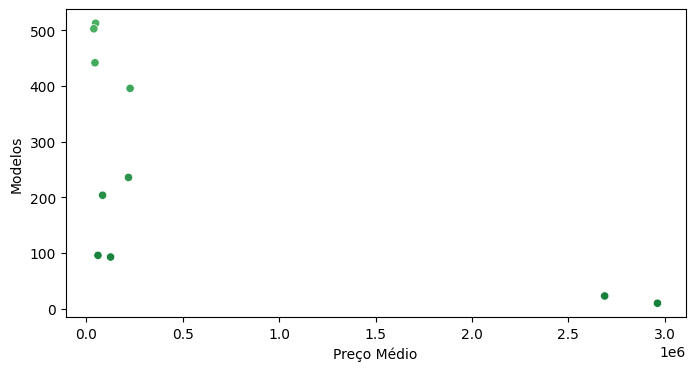

In [283]:
cores_dispersao = plt.colormaps["Greens"](np.linspace(0.8, 0.6, 10))
cmap_dispersao = mcolors.ListedColormap(cores_dispersao)

coeficientes = np.polyfit(df_marcas["Preço Médio"], df_marcas["Modelos"], 1)
regressao = np.polyval(coeficientes, df_marcas["Preço Médio"])
indices_particoes = np.linspace(0, 9, 11, dtype=int)

plt.figure(figsize=(8, 4))
fig1 = sns.scatterplot(x=df_marcas["Preço Médio"], y=df_marcas["Modelos"], 
                c=df_marcas["Modelos"], cmap=cmap_dispersao)

for i in range(10):
    segmento_x = df_marcas["Preço Médio"][indices_particoes[i]:indices_particoes[i+1]+1]
    segmento_y = regressao[indices_particoes[i]:indices_particoes[i+1]+1]
    cor = plt.colormaps["Plotly3"]((i+2)/15)
    plt.plot(segmento_x, segmento_y, color=cor)

corr1 = df_marcas["Preço Médio"].corr(df_marcas["Modelos"])  # -0.637 -> Moderada

def format_millions1(x, pos):
    if x == 0:
        return f"0"
    return f"{x/1e6:.1f}M"

# Formatação dos eixos x e y
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_millions1))

plt.title(f"Correlação de Pearson: {round(corr1, 3)}")
plt.ylabel("Quantidade de Modelos")
plt.xlabel("Preço Médio")
plt.xticks(rotation=45)
plt.show()

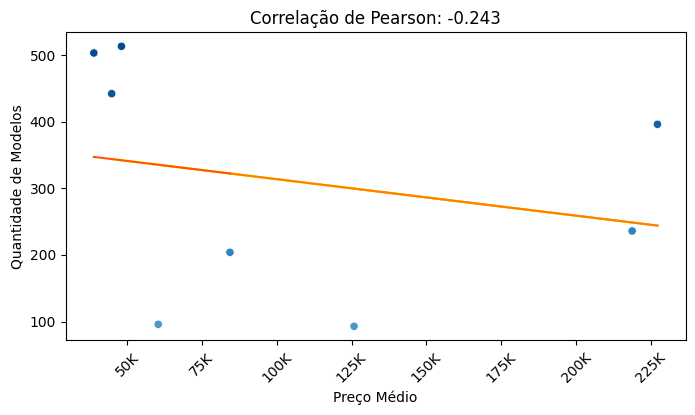

In [134]:
df_sem_luxo = df_marcas[~df_marcas["Marca"].isin(["Ferrari", "Mclaren"])]

cores_dispersao = plt.colormaps["Blues"](np.linspace(0.6, 0.9, 8))
cmap_dispersao = mcolors.ListedColormap(cores_dispersao)

coeficientes = np.polyfit(df_sem_luxo["Preço Médio"], df_sem_luxo["Modelos"], 1)
regressao = np.polyval(coeficientes, df_sem_luxo["Preço Médio"])
indices_particoes = np.linspace(0, 7, 9, dtype=int)

plt.figure(figsize=(8, 4))
fig1 = sns.scatterplot(x=df_sem_luxo["Preço Médio"], y=df_sem_luxo["Modelos"], 
                c=df_sem_luxo["Modelos"], cmap=cmap_dispersao)

for i in range(8):
    segmento_x = df_sem_luxo["Preço Médio"][indices_particoes[i]:indices_particoes[i+1]+1]
    segmento_y = regressao[indices_particoes[i]:indices_particoes[i+1]+1]
    cor = plt.colormaps["autumn"]((-i+9)/6)
    plt.plot(segmento_x, segmento_y, color=cor)

corr2 = df_sem_luxo["Preço Médio"].corr(df_sem_luxo["Modelos"])  # -0.243 -> Fraca

def format_millions2(x, pos):
    if x == 0:
        return f"0"
    return f"{x/1e3:.0f}K"

# Formatação dos eixos x e y
ax = plt.gca()
ax.xaxis.set_major_formatter(mticker.FuncFormatter(format_millions2))

plt.title(f"Correlação de Pearson: {round(corr2, 3)}")
plt.ylabel("Quantidade de Modelos")
plt.xlabel("Preço Médio")
plt.xticks(rotation=45)
plt.show()

In [ ]:
def caro(data):
    c = df[df['date']==data].sort_values(by='avg_price_brl', ascending=False) # dataframe do preço maior para o menor
    a = 0
    z = 5
    caro = []
    while a < z:
        x = c['brand'].iloc[a]
        y = c['model'].iloc[a]

        if [x,y] in caro: # se o modelo se repetir um laço roda mais uma vez
            z = z + 1
        else:
            caro.append([x,y])
        a = a + 1
    return caro

def barato(data):
    b = df[df['date']==data].sort_values(by='avg_price_brl', ascending=True) # dataframe do preço menor para o maior
    a = 0
    z = 5
    barato = []
    while a < z:

        x = b['brand'].iloc[a]
        y = b['model'].iloc[a]

        if [x,y] in barato: # se o modelo se repetir um laço roda mais uma vez
            z = z + 1
        else:
            barato.append([x,y])
        a = a + 1
    return barato